In [8]:
#The tensorflow trainings were set up to save the metrics of accuracy, cost and generalization
#to the temporary directories. These variables are parsed out for visualization. 


#Christopher Casebeer
#2018
#christopher.casebee1@msu.montana.edu



from tensorboard.backend.event_processing import event_accumulator
from tensorboard.backend.event_processing import event_multiplexer
    

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
        

#User should edit these paths and labels to the runs which were conducted. 

tboards = [r'F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017', \
           r'F:\tensorflow_temp\chirp_model\2000\Chirp_Low_Deck_High_Spatial_3_14_2017',\
           r'F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_Low_Spatial_3_14_2017',\
           r'F:\tensorflow_temp\spec_model\2000\Spec_Narrowand_3_14_2017', \
           r'F:\tensorflow_temp\spec_model\2000\Spec_wide_3_18_2017'
          ]

data_lables = ['Chirp with High Deck High Spatial', 'Chirp with Low Deck High Spatial',\
               'Chirp with High Deck Low Spatial', 'Narrowband Spectrogram w = .05s' ,'Wideband Spectrogram w=.005s']



#for p,n in  enumerate(tboards):
    

#Here I am just needing to build results_total. 
x = event_multiplexer.EventMultiplexer()
x = x.AddRunsFromDirectory(tboards[0])
x.Reload()
runs = x.Runs()

y = list(runs.keys())

folders = [];
folders_eval = [];

print(len(y))
remove = []
for k in range(0,len(y)) : 
    if ('eval' in y[k]) :
        folders_eval.append(y[k])
        continue
    else :
        folders.append(y[k])

#Get the length of stuff in the main folder.
num_results = len(folders);
cur_accum = x.GetAccumulator(folders[0])
cur_acc = cur_accum.Scalars('Accuracy_Train')
num_items = len(cur_acc)

print(num_items)
print(num_results)

print("Length:\n")
print(len(tboards))



#     results = np.zeros((num_results,3,num_items))
results_total = np.zeros((len(tboards),num_results,3,num_items))

#Get the length of stuff in the eval folder.
num_results = len(folders_eval);
cur_accum = x.GetAccumulator(folders_eval[0])
cur_acc = cur_accum.Scalars('Accuracy_Test')
num_items = len(cur_acc)

results_total_eval = np.zeros((len(tboards),num_results,2,num_items))


#Loop through both sets of data and grab the Accuracy_1 and Loss measurements. 

for p,n in  enumerate(tboards):
    

    x = event_multiplexer.EventMultiplexer()
    x = x.AddRunsFromDirectory(n)
    x.Reload()
    runs = x.Runs()
    print(runs)
    print(type(runs))

    y = list(runs.keys())
    print(y)

    folders = [];
    folders_eval = [];

    print(len(y))
    remove = []
    for k in range(0,len(y)) : 
        if ('eval' in y[k]) :
            print("Appending:" + y[k] + "\n")
            folders_eval.append(y[k])
        else :
            folders.append(y[k])

    print(y)
    #Get length of data. Does not account for the temp directories
    #Just pick the correct y[?]

    num_results = len(folders);
    cur_accum = x.GetAccumulator(folders[0])
    cur_acc = cur_accum.Scalars('Accuracy_Train')
    num_items = len(cur_acc)

    #print(num_items)
    #print(num_results)
    
#     results = np.zeros((num_results,3,num_items))
#    results_total = np.zeros((2,num_results,3,num_items))
    k = 0

    for i in range(0,len(folders)):


        cur_accum = x.GetAccumulator(folders[i])

        print(i)
        print(k)
        
        cur_acc = cur_accum.Scalars('Accuracy_Train')
        cur_loss = cur_accum.Scalars('Loss_Train')

        print(folders[i])
    #     print(cur_acc[0][0])
    #     print(cur_acc[0][2])
    #     print(cur_loss[0][0])
    #     print(cur_loss[0][0])

        #Iterate over the scalars pulling out the epoch number
        #only once. 

        for l in range(0,len(cur_acc)):
            results_total[p][k][0][l] = cur_acc[l][1]
            results_total[p][k][1][l] = cur_acc[l][2]
            results_total[p][k][2][l] = cur_loss[l][2]

        k = k + 1
        
    k = 0
    print("Enter Eval:\n")
    print(folders_eval)
    for i in range(0,len(folders_eval)):


        cur_accum = x.GetAccumulator(folders_eval[i])

        print(i)
        print(k)
        
        cur_acc = cur_accum.Scalars('Accuracy_Test')

        print(folders_eval[i])
    #     print(cur_acc[0][0])
    #     print(cur_acc[0][2])
    #     print(cur_loss[0][0])
    #     print(cur_loss[0][0])

        #Iterate over the scalars pulling out the epoch number
        #only once. 

        for l in range(0,len(cur_acc)):
            print(cur_acc[l][1])
            print(cur_acc[l][2])
            
            
            results_total_eval[p][k][0][l] = cur_acc[l][1]
            results_total_eval[p][k][1][l] = cur_acc[l][2]

        k = k + 1



#     print(cur_acc)
#     print(type(cur_acc))
#     for oper in cur_acc:
#         print(oper[1][1])

#     print(cur_acc[0:19][1])
#     print(cur_loss[1:2])



# print accuracies
# print epochs







INFO:tensorflow:Event Multiplexer initializing.
INFO:tensorflow:Event Multiplexer done initializing
INFO:tensorflow:Starting AddRunsFromDirectory: F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017\2018_03_20 12_13_09
INFO:tensorflow:Constructing EventAccumulator for F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017\2018_03_20 12_13_09
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017\2018_03_20 12_13_09\eval_one_pass
INFO:tensorflow:Constructing EventAccumulator for F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017\2018_03_20 12_13_09\eval_one_pass
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\Chirp_High_Deck_High_Spatial_3_14_2017\2018_03_20 12_20_28
INFO:tensorflow:Constructing EventAccumu

In [10]:
print(data_lables)

['Chirp with High Deck High Spatial', 'Chirp with Low Deck High Spatial', 'Chirp with High Deck Low Spatial', 'Narrowband Spectrogram w = .05s', 'Wideband Spectrogram w=.005s']


(5, 50, 3, 40)
Going into loop



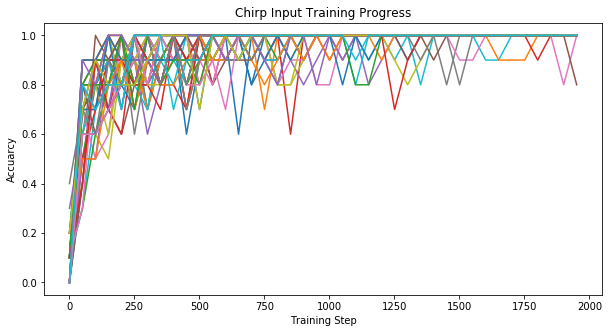

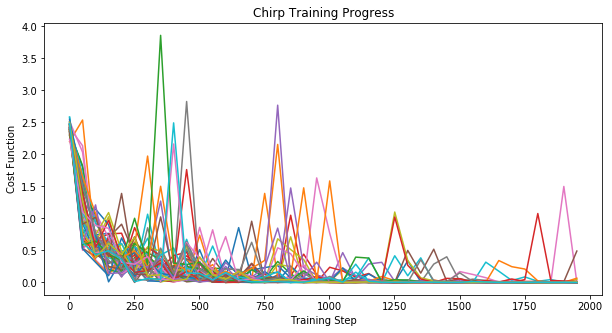

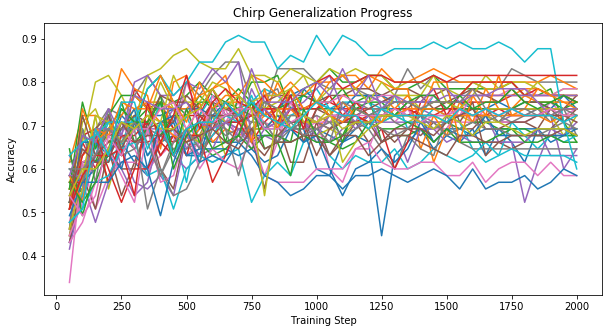

In [9]:
#Here we grab all N training runs for a particular data set, pick.
#The accuracy, cost function, and generalization accuracy are shown.

#This shows how the network is trained N times and that each training is slightly different. 
#Later we average the results of the N trainings to compare front-ends. 



matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()

pick = 3

title_type = 'Chirp'

print(results_total.shape)

print("Going into loop\n")
for k in range(0,results_total.shape[1]):
    ax.plot(results_total[pick][k][0][:],results_total[pick][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])

    
    
ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title=title_type + ' Input Training Progress')

    
plt.show()

fig, ax = plt.subplots()


for k in range(0,results_total.shape[1]):
    ax.plot(results_total[pick][k][0][:],results_total[pick][k][2][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title=title_type + ' Training Progress')


    
plt.show()


fig, ax = plt.subplots()


for k in range(0,results_total_eval.shape[1]):
    ax.plot(results_total_eval[pick][k][0][:],results_total_eval[pick][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Accuracy',
       title=title_type + ' Generalization Progress')


    
plt.show()





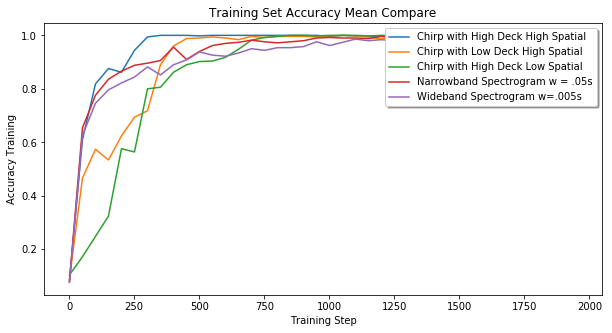

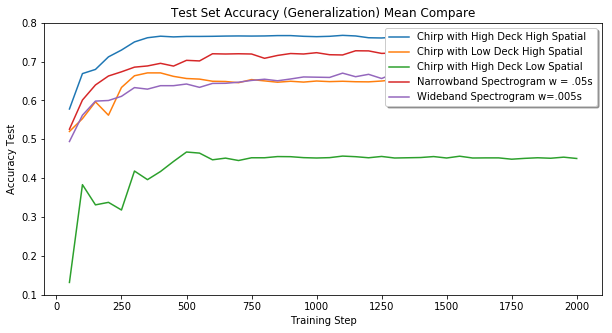

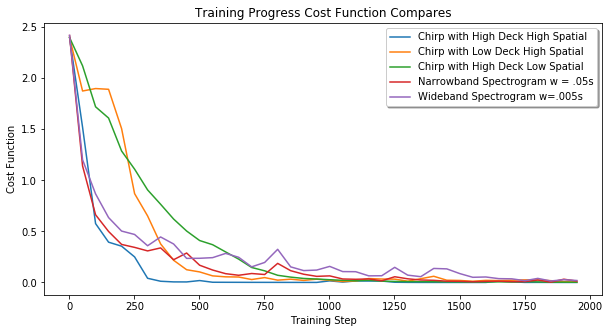

In [11]:

#Average the N trainings of the network into one line for each of the metrics across all the different
#types of front-end tests (chirplet foveations and spectrogram window choices)
#Create three graphs showing averages of each front-end for that metric. 


# print(results.shape)
train1 = results_total[0,:,1,:]
# print(mean_acc.shape)
train1 = np.mean(train1,axis=0)

# # print(results.shape)
train2 = results_total[1,:,1,:]
# print(mean_acc.shape)
train2 = np.mean(train2,axis=0)


# # print(results.shape)
train3 = results_total[2,:,1,:]
# print(mean_acc.shape)
train3 = np.mean(train3,axis=0)


# print(results.shape)
train4 = results_total[3,:,1,:]
# print(mean_acc.shape)
train4 = np.mean(train4,axis=0)

# print(results.shape)
train5 = results_total[4,:,1,:]
# print(mean_acc.shape)
train5 = np.mean(train5,axis=0)


# # print(results.shape)
# highd_lows_res_hs = results_total[4,:,1,:]
# # print(mean_acc.shape)
# highd_lows_res_hs = np.mean(highd_lows_res_hs,axis=0)

#############################################################
#Generatlizations. 

# print(results.shape)
gen1 = results_total_eval[0,:,1,:]
# print(mean_acc.shape)
gen1 = np.mean(gen1,axis=0)

# # print(results.shape)
gen2 = results_total_eval[1,:,1,:]
# print(mean_acc.shape)
gen2 = np.mean(gen2,axis=0)


# # print(results.shape)
gen3 = results_total_eval[2,:,1,:]
# print(mean_acc.shape)
gen3 = np.mean(gen3,axis=0)


# # print(results.shape)
gen4 = results_total_eval[3,:,1,:]
# print(mean_acc.shape)
gen4 = np.mean(gen4,axis=0)


gen5 = results_total_eval[4,:,1,:]
# print(mean_acc.shape)
gen5 = np.mean(gen5,axis=0)



#####################################################################
#Cost Function Progress


mean_loss = results_total[0,:,2,:]
mean_loss = np.mean(mean_loss,axis=0)

mean_loss_1 = results_total[1,:,2,:]
mean_loss_1 = np.mean(mean_loss_1,axis=0)

mean_loss_2 = results_total[2,:,2,:]
mean_loss_2 = np.mean(mean_loss_2,axis=0)

mean_loss_3 = results_total[3,:,2,:]
mean_loss_3 = np.mean(mean_loss_3,axis=0)

mean_loss_4 = results_total[4,:,2,:]
mean_loss_4 = np.mean(mean_loss_4,axis=0)



fig, ax = plt.subplots()
fig1 = ax.plot(results_total[0,0,0,:],train1, label=data_lables[0])
fig2 = ax.plot(results_total[1,0,0,:],train2, label=data_lables[1])
fig3 = ax.plot(results_total[2,0,0,:],train3, label=data_lables[2])
fig4 = ax.plot(results_total[3,0,0,:],train4, label=data_lables[3])
fig4 = ax.plot(results_total[4,0,0,:],train5, label=data_lables[4])
# hlr_hs = ax.plot(results_total[4,0,0,:],highd_lows_res_hs, label='lowd_highs_res_hs')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Accuracy Training',
       title='Training Set Accuracy Mean Compare')

plt.show()




fig, ax = plt.subplots()
fig1 = ax.plot(results_total_eval[0,0,0,:],gen1, label=data_lables[0])
fig2 = ax.plot(results_total_eval[1,0,0,:],gen2, label=data_lables[1])
fig3 = ax.plot(results_total_eval[2,0,0,:],gen3, label=data_lables[2])
fig4 = ax.plot(results_total_eval[3,0,0,:],gen4, label=data_lables[3])
fig5 = ax.plot(results_total_eval[4,0,0,:],gen5, label=data_lables[4])
#ax.plot(results[1][0][:],results[1][2][:])

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Accuracy Test',
       title='Test Set Accuracy (Generalization) Mean Compare')

plt.show()




fig, ax = plt.subplots()
fig1 = ax.plot(results_total[0,0,0,:],mean_loss, label=data_lables[0])
fig2 = ax.plot(results_total[1,0,0,:],mean_loss_1, label=data_lables[1])
fig3 = ax.plot(results_total[2,0,0,:],mean_loss_2, label=data_lables[2])
fig4 = ax.plot(results_total[3,0,0,:],mean_loss_3, label=data_lables[3])
fig5 = ax.plot(results_total[4,0,0,:],mean_loss_4, label=data_lables[4])
#ax.plot(results[1][0][:],results[1][2][:])

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Training Progress Cost Function Compares')


plt.show()

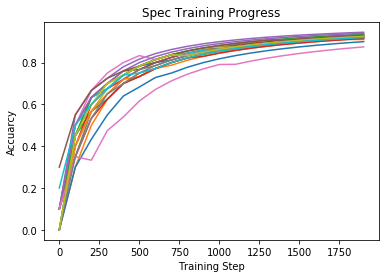

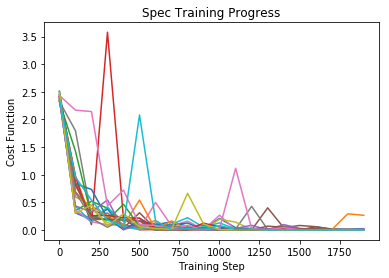

In [2]:
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)



fig, ax = plt.subplots()




for k in range(0,len(results_total[1][:][0][0])):
    ax.plot(results_total[1][k][0][:],results_total[1][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])

    
    
ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Spec Training Progress')

fig.savefig("Images/Accuarcy_All_Spec.png")
    
plt.show()

fig, ax = plt.subplots()


for k in range(0,len(results_total[1][:][0][0])):
    ax.plot(results_total[1][k][0][:],results_total[1][k][2][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Spec Training Progress')

fig.savefig("Images/Cost_All_Spec.png")
    
plt.show()

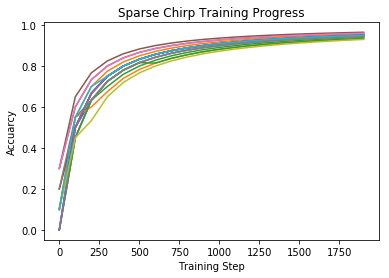

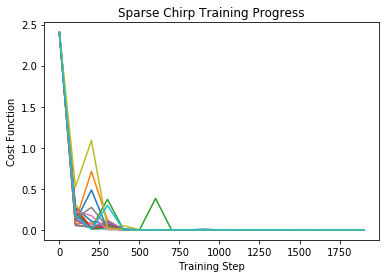

In [15]:
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)



fig, ax = plt.subplots()




for k in range(0,len(results_total[2][:][0][0])):
    ax.plot(results_total[2][k][0][:],results_total[2][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])

    
    
ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Sparse Chirp Training Progress')

fig.savefig("Images/Accuarcy_Chirp_Sparse_All.png")
    
plt.show()

fig, ax = plt.subplots()


for k in range(0,len(results_total[2][:][0][0])):
    ax.plot(results_total[2][k][0][:],results_total[2][k][2][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Sparse Chirp Training Progress')

fig.savefig("Images/Chirp_Sparse_All.png")
    
plt.show()

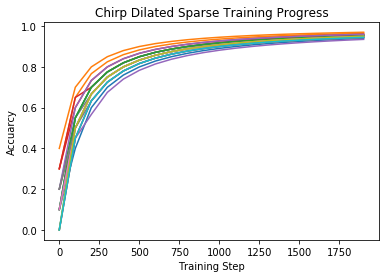

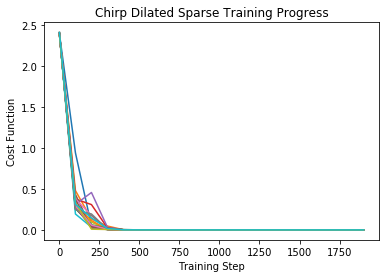

In [2]:
#Chirps with time dilations and sparse results. 


# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()



for k in range(0,len(results_total[3][:][0][0])):
    ax.plot(results_total[3][k][0][:],results_total[3][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])

    
    
ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Dilated Sparse Training Progress')

fig.savefig("Images/Accuarcy_Chirp_Sparse_Dilated_All.png")
    
plt.show()

fig, ax = plt.subplots()


for k in range(0,len(results_total[3][:][0][0])):
    ax.plot(results_total[3][k][0][:],results_total[3][k][2][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Chirp Dilated Sparse Training Progress')

fig.savefig("Images/Cost_Chirp_Sparse_Dilated_All.png")
    
plt.show()

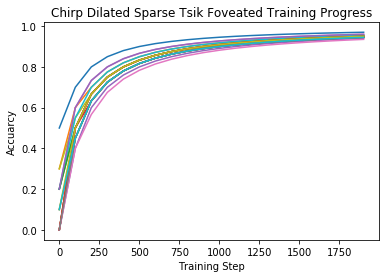

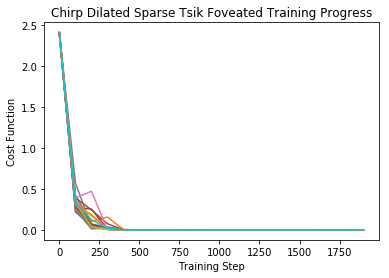

In [2]:
#Chirps with time dilations and sparse results. 


# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()



for k in range(0,len(results_total[4][:][0][0])):
    ax.plot(results_total[4][k][0][:],results_total[4][k][1][:])
    #ax.plot(results[1][0][:],results[1][2][:])

    
    
ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Dilated Sparse Tsik Foveated Training Progress')

fig.savefig("Images/Accuarcy_Chirp_Sparse_Dilated_Tsik_Foveated_All.png")
    
plt.show()

fig, ax = plt.subplots()


for k in range(0,len(results_total[4][:][0][0])):
    ax.plot(results_total[4][k][0][:],results_total[4][k][2][:])
    #ax.plot(results[1][0][:],results[1][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Chirp Dilated Sparse Tsik Foveated Training Progress')

fig.savefig("Images/Cost_Chirp_Sparse_Dilated_Tsik_Foveated_All.png")
    
plt.show()

[0.1        0.53200001 0.67866667 0.7575     0.806      0.83833333
 0.86142857 0.87875    0.89222222 0.903      0.9118182  0.91916668
 0.92538461 0.93057142 0.9352     0.939125   0.94258823 0.94566666
 0.94842106 0.95099999]


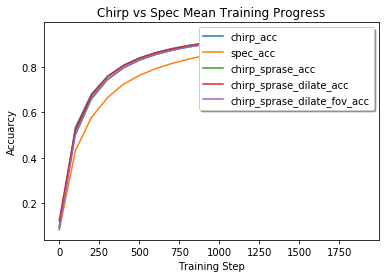

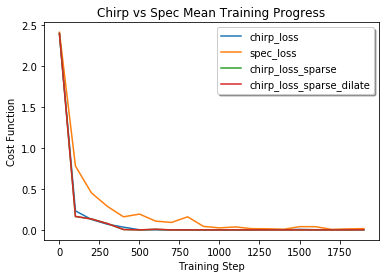

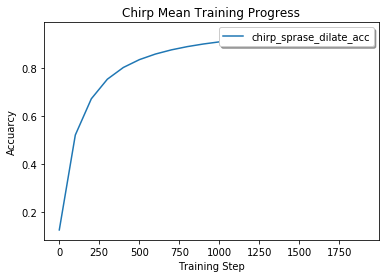

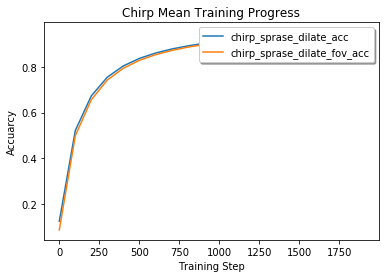

In [3]:

# print(results.shape)
mean_acc = results_total[0,:,1,:]
# print(mean_acc.shape)
mean_acc = np.mean(mean_acc,axis=0)
# print(mean_acc.shape)
print(mean_acc)


# print(results.shape)
mean_acc_s = results_total[1,:,1,:]
# print(mean_acc.shape)
mean_acc_s = np.mean(mean_acc_s,axis=0)




# print(results.shape)
mean_acc_c_sparse = results_total[2,:,1,:]
# print(mean_acc.shape)
mean_acc_c_sparse = np.mean(mean_acc_c_sparse,axis=0)


# print(results.shape)
mean_acc_c_sparse_dilated = results_total[3,:,1,:]
# print(mean_acc.shape)
mean_acc_c_sparse_dilated = np.mean(mean_acc_c_sparse_dilated,axis=0)

mean_acc_c_sparse_dilated_foveated = results_total[4,:,1,:]
# print(mean_acc.shape)
mean_acc_c_sparse_dilated_foveated = np.mean(mean_acc_c_sparse_dilated_foveated,axis=0)




fig, ax = plt.subplots()
chip_acc = ax.plot(results_total[0,0,0,:],mean_acc,label='chirp_acc')
spec_acc = ax.plot(results_total[1,0,0,:],mean_acc_s, label='spec_acc')
chirp_sprase_acc = ax.plot(results_total[2,0,0,:],mean_acc_c_sparse, label='chirp_sprase_acc')
chirp_sprase_dilate_acc = ax.plot(results_total[3,0,0,:],mean_acc_c_sparse_dilated, label='chirp_sprase_dilate_acc')
chirp_sprase_dilate_fov_acc = ax.plot(results_total[4,0,0,:],mean_acc_c_sparse_dilated_foveated, label='chirp_sprase_dilate_fov_acc')
#ax.plot(results[1][0][:],results[1][2][:])

# plt.legend([chip_acc, spec_acc], ['chip_acc', 'spec_acc'])

ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp vs Spec Mean Training Progress')


# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

fig.savefig("Images/Acc_Mean.png")


plt.show()



mean_loss = results_total[0,:,2,:]
mean_loss = np.mean(mean_loss,axis=0)



mean_loss_s = results_total[1,:,2,:]
mean_loss_s = np.mean(mean_loss_s,axis=0)

mean_loss_chirp_sparse = results_total[2,:,2,:]
mean_loss_chirp_sparse = np.mean(mean_loss_chirp_sparse,axis=0)

mean_loss_chirp_sparse_dilate = results_total[3,:,2,:]
mean_loss_chirp_sparse_dilate = np.mean(mean_loss_chirp_sparse_dilate,axis=0)


fig, ax = plt.subplots()
chirp_loss = ax.plot(results_total[0,0,0,:],mean_loss, label='chirp_loss')
spec_loss = ax.plot(results_total[1,0,0,:],mean_loss_s, label='spec_loss')
chirp_loss_sparse = ax.plot(results_total[2,0,0,:],mean_loss_chirp_sparse, label='chirp_loss_sparse')
chirp_loss_sparse_dilate = ax.plot(results_total[3,0,0,:],mean_loss_chirp_sparse, label='chirp_loss_sparse_dilate')
#ax.plot(results[1][0][:],results[1][2][:])

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Chirp vs Spec Mean Training Progress')

fig.savefig("Images/Cost_Mean.png")

plt.show()




fig, ax = plt.subplots()
chirp_sprase_dilate_acc = ax.plot(results_total[3,0,0,:],mean_acc_c_sparse_dilated, label='chirp_sprase_dilate_acc')
#ax.plot(results[1][0][:],results[1][2][:])

# plt.legend([chip_acc, spec_acc], ['chip_acc', 'spec_acc'])

ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Mean Training Progress')


# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

fig.savefig("Images/Chirp_Sparse_Dilate_Training_Mean.png")


plt.show()


fig, ax = plt.subplots()
chirp_sprase_dilate_acc = ax.plot(results_total[3,0,0,:],mean_acc_c_sparse_dilated, label='chirp_sprase_dilate_acc')
mean_acc_c_sparse_dilated_foveated = ax.plot(results_total[4,0,0,:],mean_acc_c_sparse_dilated_foveated, label='chirp_sprase_dilate_fov_acc')
#ax.plot(results[1][0][:],results[1][2][:])

# plt.legend([chip_acc, spec_acc], ['chip_acc', 'spec_acc'])

ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Mean Training Progress')


# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

fig.savefig("Images/Chirp_Sparse_Dilate_Training_FOV_VS_NONFOV_Mean.png")


plt.show()










# print(results[4][1][:])
# print (mean_acc)
# print(mean_acc.shape)
# mean_loss = np.mean(results[:][2][:], axis=0)

In [5]:
print(results_total.shape)

(2, 50, 3, 20)


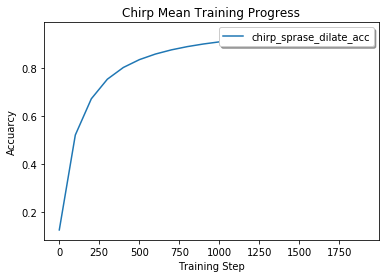

In [3]:


# print(results.shape)
mean_acc_c_sparse_dilated = results_total[3,:,1,:]
# print(mean_acc.shape)
mean_acc_c_sparse_dilated = np.mean(mean_acc_c_sparse_dilated,axis=0)



fig, ax = plt.subplots()
chirp_sprase_dilate_acc = ax.plot(results_total[3,0,0,:],mean_acc_c_sparse_dilated, label='chirp_sprase_dilate_acc')
#ax.plot(results[1][0][:],results[1][2][:])

# plt.legend([chip_acc, spec_acc], ['chip_acc', 'spec_acc'])

ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Mean Training Progress')


# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

fig.savefig("Images/Chirp_Sparse_Dilate_Training_Mean.png")


plt.show()

In [15]:
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.backend.event_processing import event_multiplexer
    

import matplotlib.pyplot as plt
import numpy as np
        
    


tboards = [r'F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res', \
           r'F:\tensorflow_temp\chirp_model\2000\07_13_low_res_no_sparse', \
           r'F:\tensorflow_temp\chirp_model\2000\07_14_low_res_sparse', \
           r'F:\tensorflow_temp\chirp_model\2000\07_10', \
          r'F:\tensorflow_temp\spec_model\2000\06_12', \
           
          
          
          ]


#for p,n in  enumerate(tboards):
    

#Here I am just needing to build results_total. 
x = event_multiplexer.EventMultiplexer()
x = x.AddRunsFromDirectory(tboards[0])
x.Reload()
runs = x.Runs()

y = list(runs.keys())

folders = [];


print(len(y))
remove = []
for k in range(0,len(y)) : 
    if ('eval' in y[k]) :
        continue
    else :
        folders.append(y[k])


num_results = len(folders);
cur_accum = x.GetAccumulator(folders[0])
cur_acc = cur_accum.Scalars('Accuracy_1')
num_items = len(cur_acc)

print(num_items)
print(num_results)


#     results = np.zeros((num_results,3,num_items))
results_total = np.zeros((5,num_results,3,num_items))


#Loop through both sets of data and grab the Accuracy_1 and Loss measurements. 

for p,n in  enumerate(tboards):
    

    x = event_multiplexer.EventMultiplexer()
    x = x.AddRunsFromDirectory(n)
    x.Reload()
    runs = x.Runs()
    print(runs)
    print(type(runs))

    y = list(runs.keys())
    print(y)

    folders = [];


    print(len(y))
    remove = []
    for k in range(0,len(y)) : 
        if ('eval' in y[k]) :
            continue
        else :
            folders.append(y[k])

    print(y)
    #Get length of data. Does not account for the temp directories
    #Just pick the correct y[?]

    num_results = len(folders);
    cur_accum = x.GetAccumulator(folders[0])
    cur_acc = cur_accum.Scalars('Accuracy_1')
    num_items = len(cur_acc)

    print(num_items)
    print(num_results)
    
    failures = 0

    k = 0

    for i in range(0,len(folders)):


        cur_accum = x.GetAccumulator(folders[i])

        print(i)
        print(k)
        
        
  
        cur_acc = cur_accum.Scalars('Accuracy_1')
        cur_loss = cur_accum.Scalars('Loss')
            

        print(folders[i])

        
        
        
        for l in range(0,len(cur_acc)):
            results_total[p][k][0][l] = cur_acc[l][1]
            results_total[p][k][1][l] = cur_acc[l][2]
            results_total[p][k][2][l] = cur_loss[l][2]

                

        k = k + 1
        
        
        
        #Chirps with time dilations and sparse results. 













INFO:tensorflow:Event Multiplexer initializing.
INFO:tensorflow:Event Multiplexer done initializing
INFO:tensorflow:Starting AddRunsFromDirectory: F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_29
INFO:tensorflow:Constructing EventAccumulator for F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_29
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_29\eval
INFO:tensorflow:Constructing EventAccumulator for F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_29\eval
INFO:tensorflow:Adding events from directory F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_44
INFO:tensorflow:Constructing EventAccumulator for F:\tensorflow_temp\chirp_model\2000\07_13_low_low_res\2018_03_07 13_08_44
INFO:tensorflow:Adding events from directory F:\tensorflow_t

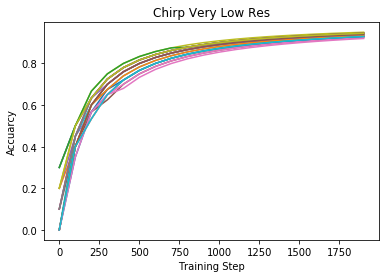

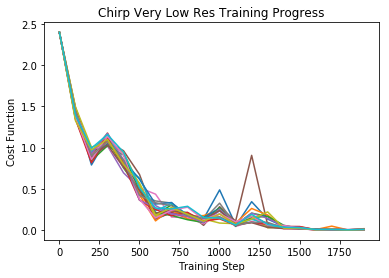

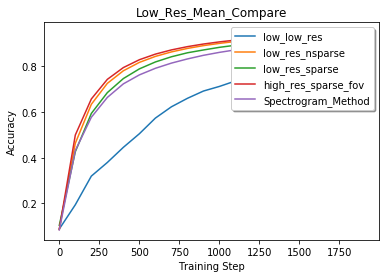

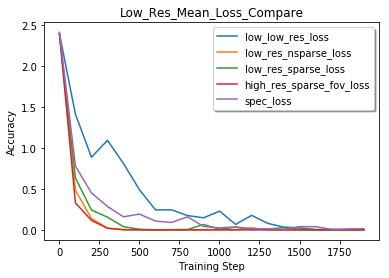

In [18]:
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()



for k in range(0,len(results_total[2][:][0][0])):
    ax.plot(results_total[2][k][0][:],results_total[2][k][1][:])


ax.set(xlabel='Training Step', ylabel='Accuarcy',
       title='Chirp Very Low Res')

fig.savefig("Images/Accuarcy_Low_Res.png")
    
plt.show()

fig, ax = plt.subplots()


for k in range(0,len(results_total[0][:][0][0])):
    ax.plot(results_total[0][k][0][:],results_total[0][k][2][:])
    
ax.set(xlabel='Training Step', ylabel='Cost Function',
       title='Chirp Very Low Res Training Progress')

fig.savefig("Images/Cost_Chirp_Low_Res.png")
    
plt.show()



# print(results.shape)
low_low_res = results_total[0,:,1,:]
# print(mean_acc.shape)
low_low_res = np.mean(low_low_res,axis=0)

# print(results.shape)
low_res_nsparse = results_total[1,:,1,:]
# print(mean_acc.shape)
low_res_nsparse = np.mean(low_res_nsparse,axis=0)

# print(results.shape)
low_res_sparse = results_total[2,:,1,:]
# print(mean_acc.shape)
low_res_sparse = np.mean(low_res_sparse,axis=0)


# print(results.shape)
fov_res_sparse = results_total[3,:,1,:]
# print(mean_acc.shape)
fov_res_sparse = np.mean(fov_res_sparse,axis=0)

# print(results.shape)
spec = results_total[4,:,1,:]
# print(mean_acc.shape)
spec = np.mean(spec,axis=0)




fig, ax = plt.subplots()
llr = ax.plot(results_total[0,0,0,:],low_low_res, label='low_low_res')
lr_nsparse = ax.plot(results_total[1,0,0,:],low_res_nsparse, label='low_res_nsparse')
lr_sparse = ax.plot(results_total[2,0,0,:],low_res_sparse, label='low_res_sparse')
hr_fov_sparse = ax.plot(results_total[3,0,0,:],fov_res_sparse, label='high_res_sparse_fov')
s = ax.plot(results_total[4,0,0,:],spec, label='Spectrogram_Method')
#ax.plot(results[1][0][:],results[1][2][:])

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Accuracy',
       title='Low_Res_Mean_Compare')

plt.show()




low_low_res_loss = results_total[0,:,2,:]
low_low_res_loss = np.mean(low_low_res_loss,axis=0)



low_res_nsparse_l = results_total[1,:,2,:]
low_res_nsparse_l = np.mean(low_res_nsparse_l,axis=0)

low_res_sparse_l = results_total[2,:,2,:]
low_res_sparse_l = np.mean(low_res_sparse_l,axis=0)

high_res_sparse_fov_l = results_total[3,:,2,:]
high_res_sparse_fov_l = np.mean(high_res_sparse_fov_l,axis=0)

spec_l = results_total[4,:,2,:]
spec_l = np.mean(spec_l,axis=0)


fig, ax = plt.subplots()
llr_l = ax.plot(results_total[0,0,0,:],low_low_res_loss, label='low_low_res_loss')
lr_ns_l = ax.plot(results_total[1,0,0,:],low_res_nsparse_l, label='low_res_nsparse_loss')
lr_s_l = ax.plot(results_total[2,0,0,:],low_res_sparse_l, label='low_res_sparse_loss')
h_res_sparse_fov_l_loss = ax.plot(results_total[3,0,0,:],high_res_sparse_fov_l, label='high_res_sparse_fov_loss')
chirp_loss_sparse_dilate = ax.plot(results_total[4,0,0,:],spec_l, label='spec_loss')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

    
ax.set(xlabel='Training Step', ylabel='Accuracy',
       title='Low_Res_Mean_Loss_Compare')

plt.show()





